<a href="https://colab.research.google.com/github/lucib3196/Machine_Learning_Projects/blob/main/Predicting_Tip_Size_with_Linear_Regression_and_K_means_Clustering_Enhanced_by_GPT_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Tip Size with Linear Regression and K-means Clustering Enhanced by GPT Analysis
In this notebook we will be predicting the size of tips using machine learning models and large language models

**Model Used**
- Linear Regression: For predictive modeling
- K-Means Clustering: Identifyin underlying patterns in our data
- LLM Gpt 3.5: With K-means clustering for indepth analysis of the cluster

In [64]:
!pip install openai # Install OpenAI

In [65]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from openai import OpenAI
import os
from getpass import getpass

# Set matplotlib to inline mode
%matplotlib inline


## Importing DataSet

In [66]:
# Import DataSet
df = pd.read_csv(r"/content/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Analysis

<ipython-input-67-e447fe81380b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

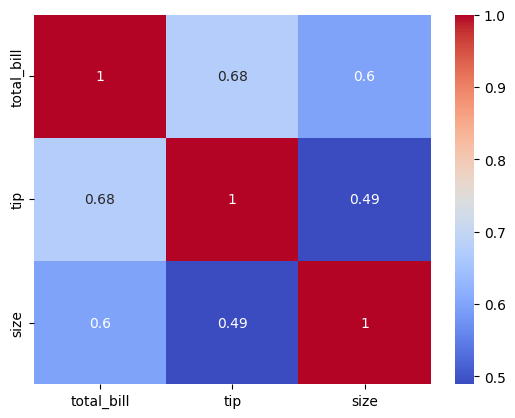

In [67]:
# Explolatory data analysis correlation and heatmap
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap = "coolwarm")

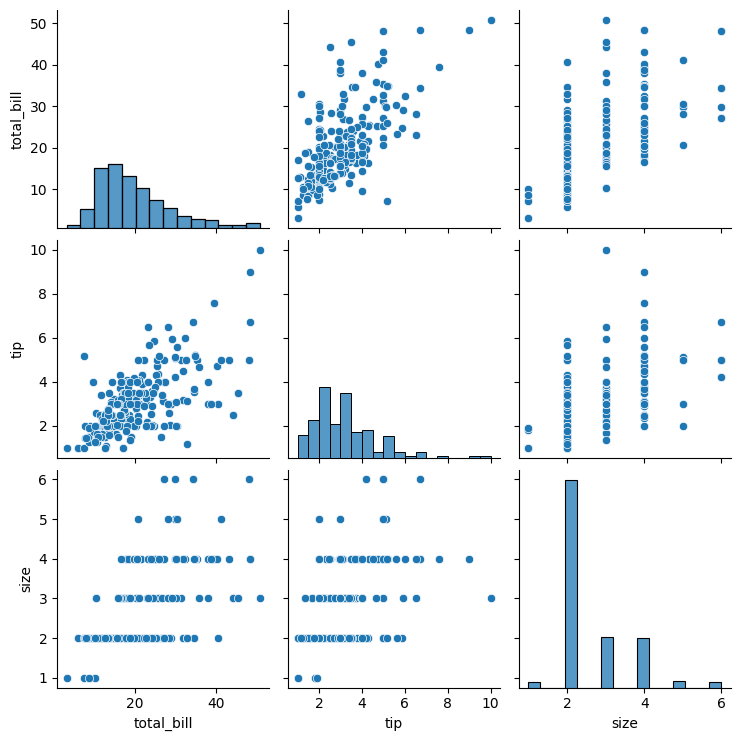

In [68]:
# Exploratory Data Analysis Pair Plot
sns.pairplot(df)

## Data Prep

In [69]:
# Convert Non-Numeric data using hot-encoding
df = pd.get_dummies(df,columns = ["time", "day","smoker", "sex"])

In [70]:
df

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
0,16.99,1.01,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,3,1,0,0,0,1,0,1,0,0,1
2,21.01,3.50,3,1,0,0,0,1,0,1,0,0,1
3,23.68,3.31,2,1,0,0,0,1,0,1,0,0,1
4,24.59,3.61,4,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,1,0,0,1,0,0,0,1,1,0
241,22.67,2.00,2,1,0,0,1,0,0,0,1,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [71]:
# Explolatory data analysis correlation and heatmap
df_corr = df.corr()
df_corr

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
total_bill,1.000000,0.675734,0.598315,0.183118,-0.183118,-0.086168,0.054919,0.122953,-0.138174,-0.085721,0.085721,-0.144877,0.144877
tip,0.675734,1.000000,0.489299,0.121629,-0.121629,-0.055463,-0.002790,0.125114,-0.095879,-0.005929,0.005929,-0.088862,0.088862
size,0.598315,0.489299,1.000000,0.103411,-0.103411,-0.142184,-0.041121,0.193054,-0.072598,0.133178,-0.133178,-0.086195,0.086195
time_Dinner,0.183118,0.121629,0.103411,1.000000,-1.000000,-0.058159,0.462709,0.418071,-0.917996,-0.054921,0.054921,-0.205231,0.205231
time_Lunch,-0.183118,-0.121629,-0.103411,-1.000000,1.000000,0.058159,-0.462709,-0.418071,0.917996,0.054921,-0.054921,0.205231,-0.205231
day_Fri,-0.086168,-0.055463,-0.142184,-0.058159,0.058159,1.000000,-0.216319,-0.195451,-0.169608,-0.244316,0.244316,0.071060,-0.071060
day_Sat,0.054919,-0.002790,-0.041121,0.462709,-0.462709,-0.216319,1.000000,-0.500682,-0.434480,-0.155744,0.155744,-0.053957,0.053957
day_Sun,0.122953,0.125114,0.193054,0.418071,-0.418071,-0.195451,-0.500682,1.000000,-0.392566,0.181624,-0.181624,-0.168106,0.168106
day_Thur,-0.138174,-0.095879,-0.072598,-0.917996,0.917996,-0.169608,-0.434480,-0.392566,1.000000,0.128534,-0.128534,0.194445,-0.194445
smoker_No,-0.085721,-0.005929,0.133178,-0.054921,0.054921,-0.244316,-0.155744,0.181624,0.128534,1.000000,-1.000000,0.002816,-0.002816


## Assigning Training and Test Data

In [72]:
# Assign x and y variables
X = df.drop(["tip", "smoker_No","smoker_Yes" ], axis = 1)
Y = df["tip"]

In [73]:
X

,total_bill,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,sex_Female,sex_Male
0,16.99,2,1,0,0,0,1,0,1,0
1,10.34,3,1,0,0,0,1,0,0,1
2,21.01,3,1,0,0,0,1,0,0,1
3,23.68,2,1,0,0,0,1,0,0,1
4,24.59,4,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,0,1,0,0,0,1
240,27.18,2,1,0,0,1,0,0,1,0
241,22.67,2,1,0,0,1,0,0,0,1
242,17.82,2,1,0,0,1,0,0,0,1


In [74]:
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [75]:
# Split data into test/train set
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3, shuffle = True)


In [76]:
y_train

187    2.00
133    2.00
91     3.50
100    2.50
87     4.00
       ... 
227    3.00
166    2.24
149    2.00
62     1.98
215    1.10
Name: tip, Length: 170, dtype: float64

## Model Building

### Linear Regression

In [77]:
# Model Creation
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [78]:
model.intercept_

0.7903366470598838

In [79]:
model.coef_

array([ 0.0828076 ,  0.25850894, -0.12535662,  0.12535662,  0.09083495,
       -0.02199361,  0.20511021, -0.27395154,  0.02514701, -0.02514701])

#### Visualization

Text(0.5, 1.0, 'Linear Regression Visalization')

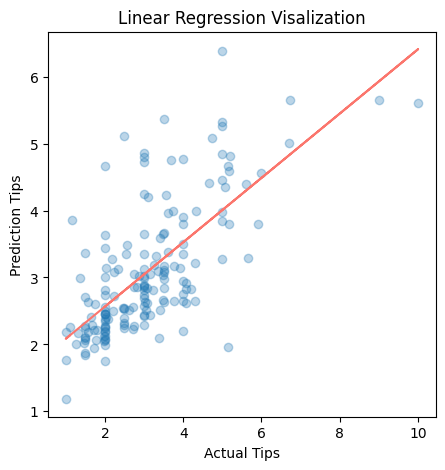

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (5,5))
plt.scatter(y_train, model.predict(x_train), alpha = 0.3)

x = np.polyfit(y_train,model.predict(x_train),1)
p = np.poly1d(x)
plt.plot(y_train,p(y_train),"#FB766D")

plt.plot()
plt.ylabel("Prediction Tips")
plt.xlabel("Actual Tips")
plt.title("Linear Regression Visalization")

In [81]:
mae_train = mean_absolute_error(y_train,model.predict(x_train))
print(mae_train)

0.7352407797809755


#### Predicting Data

In [82]:
col = df.columns.tolist()
print("customer_data = [")
for variable in col:
    print("\t0, " + "#" + variable)
print("]")

customer_data = [
	0, #total_bill
	0, #tip
	0, #size
	0, #time_Dinner
	0, #time_Lunch
	0, #day_Fri
	0, #day_Sat
	0, #day_Sun
	0, #day_Thur
	0, #smoker_No
	0, #smoker_Yes
	0, #sex_Female
	0, #sex_Male
]


In [83]:
customer_data_value = [
	50, #total_bill
	2, #size
	0, #time_Dinner
	1, #time_Lunch
	0, #day_Fri
	0, #day_Sat
	1, #day_Sun
	0, #day_Thur
	0, #sex_Female
	0, #sex_Male
]
#make_predictions
jamie = model.predict([customer_data_value])
jamie

print("Predicted Customer Data $"+ str(jamie[0]) )

Predicted Customer Data $5.778201462448208


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### KMeans Clustering


In [84]:
df = pd.read_csv("/content/tips.csv")

In [85]:
X = df[["total_bill", "size"]]

In [86]:
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [93]:
model = KMeans(n_clusters = 5)

model.fit(X)

model_predict = model.predict(X)
centroids = model.cluster_centers_
print(model.cluster_centers_)

[[22.46943396  2.75471698]
 [43.17714286  3.78571429]
 [10.93641791  1.97014925]
 [16.56223684  2.34210526]
 [30.61588235  3.47058824]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualization

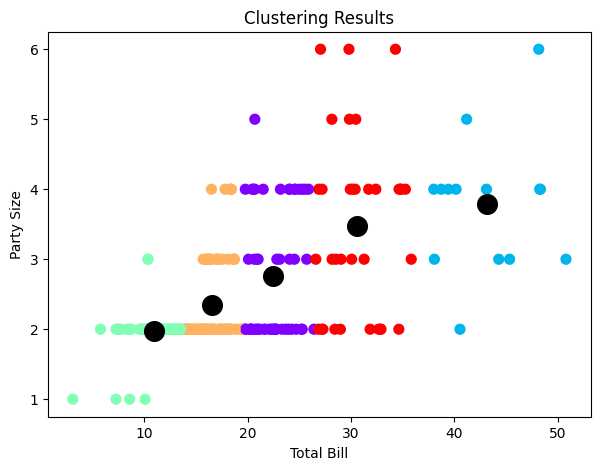

In [94]:

plt.figure(figsize=(7, 5))

# Scatter plot of the data points with colors based on model predictions
plt.scatter(X["total_bill"], X["size"], c=model_predict, cmap='rainbow', s=50)
# Scatter plot of centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200, alpha=1)

# Title
plt.title('Clustering Results')

# X-axis label
plt.xlabel('Total Bill')

# Y-axis label
plt.ylabel('Party Size')

plt.show()


#### Using GPT to describe cluster data

In [95]:
# Insert Personal API key
api_key = getpass('Enter your OpenAI API Key: ')
os.environ['OPENAI_API_KEY'] = api_key

Enter your OpenAI API Key: ··········


We can simply generate a chat completion by providing our cluster data along with the x and y variables, and the GPT model will describe the meaning of our data.

In [105]:
# Get the indices that would sort the first column
sorted_indices = np.argsort(centroids[:, 0])

# Use these indices to reorder the rows of the array
centroids_org = centroids[sorted_indices]

print("Sorted by the first column:")
print(centroids_org)

Sorted by the first column:
[[10.93641791  1.97014925]
 [16.56223684  2.34210526]
 [22.46943396  2.75471698]
 [30.61588235  3.47058824]
 [43.17714286  3.78571429]]


In [109]:
client = OpenAI()
x = "total_bill"
y = "Tip Size"
cluster_analysis_prompt =  f"""I have the following cluster data points where X = {x} and Y = {y}. The following is the cluster centroids {str(centroids_org)}.
You are tasked with describing what the cluster data represents
It will follow the following structure
Cluster i: Coordinates (x,y):
Description: Description of cluster's numerical significance
Analysis: Analysis of customer spending habits """
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages = [
      {"role": "system", "content": "You are a helpful data analysist, with machine learning expertise."},
      {"role": "user", "content": cluster_analysis_prompt}
  ],
  temperature = 0
)
print(response.choices[0].message.content)


Cluster 1: Coordinates (10.94, 1.97)
Description: This cluster represents customers who have lower total bills and tip sizes compared to other clusters.
Analysis: Customers in this cluster tend to spend less on their meals and leave smaller tips. They may be more budget-conscious or prefer simpler, less expensive dining options.

Cluster 2: Coordinates (16.56, 2.34)
Description: This cluster includes customers with moderate total bills and tip sizes.
Analysis: Customers in this cluster exhibit average spending habits, neither overspending nor being too frugal. They likely choose mid-range dining options and leave reasonable tips based on their bill amount.

Cluster 3: Coordinates (22.47, 2.75)
Description: This cluster represents customers with slightly higher total bills and tip sizes compared to the previous clusters.
Analysis: Customers in this cluster are willing to spend a bit more on their meals and leave slightly larger tips. They may prefer dining at slightly more upscale resta